In [2]:
import numpy as np
import matplotlib.pyplot as plt

from evaluation import eval_UCB, eval_TS, eval_PHE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
d = 10
n_gen_context = 20 # Sample from the action set
alpha_set = [1.0] # Bonus for UCB
v_set = [1.0] # Bonus for TS
alpha_PHE_set = [1.0] # Bonus for PHE
T = 1000 # Timesteps
n_sim = 3 # Number of Simulations

In [4]:
best_UCB = eval_UCB(n_gen_context=n_gen_context, d=d, alpha_set=alpha_set, T=T, n_sim=n_sim, output=True)

UCB Simulation 1, N=20, d=10, alpha=1.000


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1051.90it/s]


UCB Simulation 2, N=20, d=10, alpha=1.000


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1063.16it/s]


UCB Simulation 3, N=20, d=10, alpha=1.000


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1061.42it/s]


In [5]:
best_TS = eval_TS(n_gen_context=n_gen_context, d=d, v_set=v_set, T=T, n_sim=n_sim, output=True)

TS Simulation 1, N=20, d=10, v=1.000


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1023.93it/s]


TS Simulation 2, N=20, d=10, v=1.000


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1022.33it/s]


TS Simulation 3, N=20, d=10, v=1.000


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1025.55it/s]


In [6]:
best_PHE = eval_PHE(n_gen_context=n_gen_context, d=d, alpha_set=alpha_PHE_set, T=T, n_sim=n_sim, output=True)

PHE Simulation 1, N=20, d=10, alpha=1.000


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 970.67it/s]


PHE Simulation 2, N=20, d=10, alpha=1.000


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 952.69it/s]


PHE Simulation 3, N=20, d=10, alpha=1.000


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 957.35it/s]


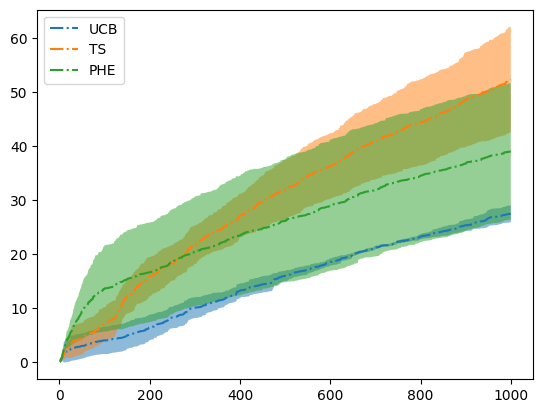

In [7]:
mean_UCB = np.mean(best_UCB['regrets'], axis=0)
std_UCB = np.std(best_UCB['regrets'], axis=0)
mean_TS = np.mean(best_TS['regrets'], axis=0)
std_TS = np.std(best_TS['regrets'], axis=0)
mean_PHE = np.mean(best_PHE['regrets'], axis=0)
std_PHD = np.std(best_PHE['regrets'], axis=0)

plt.plot(np.arange(1,T+1), mean_UCB, '-.', label='UCB')
plt.fill_between(np.arange(1,T+1), mean_UCB-std_UCB, mean_UCB+std_UCB, alpha=0.5)
plt.plot(np.arange(1,T+1), mean_TS, '-.', label='TS')
plt.fill_between(np.arange(1,T+1), mean_TS-std_TS, mean_TS+std_TS, alpha=0.5)
plt.plot(np.arange(1,T+1), mean_PHE, '-.', label='PHE')
plt.fill_between(np.arange(1,T+1), mean_PHE-std_PHD, mean_PHE+std_PHD, alpha=0.5)

plt.legend()
plt.show()
plt.close()